## Problem Statement :
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. The company wishes to identify the most potential leads i.e ‘Hot Leads’. The successfully identification of the hot leads making the lead conversion rate go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Objectives :

1. To build a logestic regression model to assign a lead score between 0 to 100 to each of the leads which can be used by the company to target potential leads.

2. There are some more problems presented by the company which model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. 

## Steps For Case Study :
1. Read and Understand the Data
2. Cleaning of the data
3. Data Visualisation
4. Preparation of the data
5. Model Building
6. Model Evaluation
7. Model Predictions on test data set
8. Summary

In [985]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time, warnings
import datetime as dt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor    

pd.options.display.max_columns = None
pd.options.display.max_rows = 100
pd.options.display.float_format = "{:.2f}".format


## Step 1: Reading & Understanding the data

In [986]:
# importing the dataset

lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### 1.1 Inspection of the data set :

In [987]:
lead_df.shape

(9240, 37)

In [988]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [989]:
lead_df.size

341880

In [990]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [991]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [992]:
lead_df.duplicated().sum()

0

### Insights :
1. Many columns of the dataset have null values. 
2. Prospect Id and Lead Number both are unique identifiers.
3. Dataset contains total 37 columns
4. Dataset have 0 duplicate values

## Step 2: Data Cleaning

### 2.1 Null Values :

In [993]:
# Checking the null values

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [994]:
# Checking the % of null values

round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [995]:
# Let's drop the columns which are having > 3000 null values

for col in lead_df.columns:
    if lead_df[col].isnull().sum() > 3000:
        lead_df.drop(col, 1, inplace=True)

In [996]:
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [997]:
# Let's drop the unwanted columns like "City" and "Country" 

lead_df.drop(["City"],axis=1, inplace=True)
lead_df.drop(["Country"],axis=1, inplace=True)



In [998]:
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

### 2.2 Dealing with a level "Select" value :

In [1155]:
# Many columns of the data set contains a level "Select", let's check the value counts of all the variable

for column in lead_df:
    print(lead_df[column].astype("category").value_counts())
    print('___________________________________________________')


0    3308
1    3065
Name: converted, dtype: int64
___________________________________________________
0.0      1347
2.0      1225
3.0       937
4.0       823
5.0       578
6.0       337
1.0       260
7.0       225
8.0       162
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0       14
17.0       12
18.0       12
20.0       10
19.0        6
21.0        5
27.0        5
23.0        5
24.0        3
25.0        3
22.0        3
29.0        2
26.0        2
28.0        1
30.0        1
32.0        1
42.0        1
43.0        1
55.0        1
74.0        1
115.0       1
251.0       1
Name: total_visits, dtype: int64
___________________________________________________
0       1351
60        15
127       14
74        13
87        13
        ... 
712        1
1382       1
715        1
1378       1
2272       1
Name: time_spent_on_website, Length: 1613, dtype: int64
___________________________________________________
0.0     1347
2.0     1324
3.0 

### Insights :
- Total three Columns from the data set contains a "Select" level, Let's check them

In [1000]:
lead_df["Lead Profile"].astype("category").value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1001]:
lead_df["Specialization"].astype("category").value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1002]:
lead_df["How did you hear about X Education"].astype("category").value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

### Insights :
- Variables "Lead Profile" & "How did you here about X Education" have a lot of rows which have a "Select" value which is no use to analysis.

In [1003]:
# let's drop these variable

lead_df.drop(["Lead Profile", "How did you hear about X Education"], axis=1, inplace=True)

In [1004]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 2.3 Dealing with "One value majorly present in columns" :

In [1005]:
# let's drop the columns in which only one value was majorly present for all the data points

lead_df.drop(["Do Not Call", "Search", "Magazine", "Digital Advertisement", "Newspaper Article",
             "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses",
             "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"], axis=1, inplace=True)

In [1006]:
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1007]:
# Let's drop the column "What matters most to you in choosing a course" as one value majorly present 
# in the column.

lead_df.drop(["What matters most to you in choosing a course"], axis=1, inplace=True)

### 2.4 Dealing with null values :

In [1008]:
# let's check the null values in the data set
lead_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [1009]:
# Let's drop the null rows for the columns which have null values

lead_df = lead_df[~pd.isnull(lead_df["TotalVisits"])]

In [1010]:
lead_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [1011]:
lead_df = lead_df[~pd.isnull(lead_df["Lead Source"])]

In [1012]:
lead_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [1013]:
lead_df = lead_df[~pd.isnull(lead_df["Specialization"])]

In [1014]:
lead_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           1270
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [1015]:
lead_df = lead_df[~pd.isnull(lead_df["What is your current occupation"])]

In [1016]:
lead_df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [1017]:
# let's drop the variables "Prospect ID" & "Lead Number" as they won't be of any use
# for analysis.

lead_df.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

In [1018]:
# let's drop the variables "Do Not Email" as it won't be of any use

lead_df.drop(["Do Not Email"], axis=1, inplace=True)

In [1019]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified


### 2.5 Renaming The Columns :

In [1020]:
lead_df.columns = lead_df.columns.str.replace(" ", "_").str.lower()
lead_df.columns

Index(['lead_origin', 'lead_source', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'specialization', 'what_is_your_current_occupation',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [1021]:
lead_df.rename(columns={"totalvisits":"total_visits", 
                        "total_time_spent_on_website":"time_spent_on_website",
                        "what_is_your_current_occupation":"occupation", 
                        "a_free_copy_of_mastering_the_interview":"mastering_the_interview"}, inplace=True)

In [1022]:
lead_df.head()

,lead_origin,lead_source,converted,total_visits,time_spent_on_website,page_views_per_visit,last_activity,specialization,occupation,mastering_the_interview,last_notable_activity
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified


### 2.6 Checking The Outliers :

In [1023]:
lead_df.nunique()

lead_origin                   4
lead_source                  16
converted                     2
total_visits                 38
time_spent_on_website      1613
page_views_per_visit        107
last_activity                16
specialization               19
occupation                    6
mastering_the_interview       2
last_notable_activity        14
dtype: int64

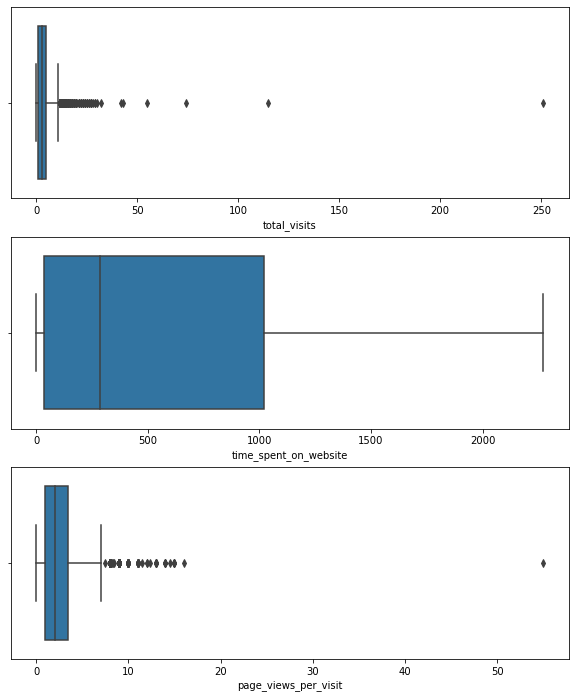

In [1024]:
plt.figure(figsize=[10,12])

plt.subplot(3,1,1)
sns.boxplot(lead_df["total_visits"])

plt.subplot(3,1,2)
sns.boxplot(lead_df["time_spent_on_website"])

plt.subplot(3,1,3)
sns.boxplot(lead_df["page_views_per_visit"])

plt.show()

### Insights :
- The above boxplots are showing that,
columns "total_visits" and "page_views_per_visit" are have upper bound outliers and the data can be cappped at 99 percentile.


## Step 3: Data Visualisation :

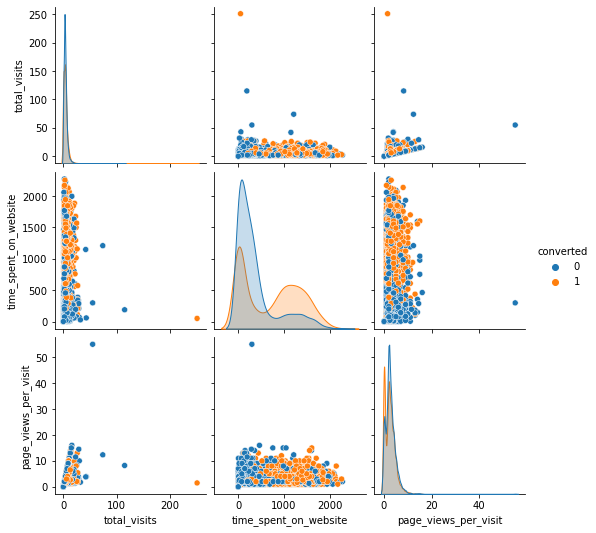

In [1025]:
# let's visualise the continuous variables 

sns.pairplot(lead_df, vars=["total_visits", "time_spent_on_website", "page_views_per_visit"],diag_kind="kde", hue="converted")
plt.show()

### Insights :
Some extent linear relationship between total_visits & page_views_per_visit variables. 

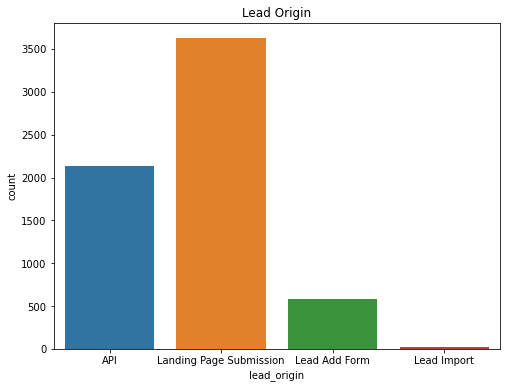

In [1026]:
# let's visualise the categorical variables

plt.figure(figsize=[8,6])
sns.countplot(lead_df["lead_origin"])
plt.title("Lead Origin")
plt.show()

### Insights : 
Highest lead generated from "Landing Page Submission" Origin.

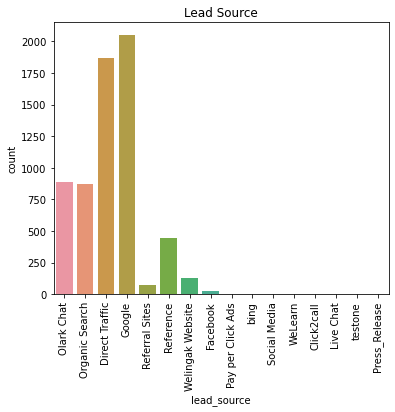

In [1027]:
plt.figure(figsize=[6,5])
sns.countplot(lead_df["lead_source"]).tick_params(axis='x', rotation = 90)
plt.title("Lead Source")
plt.show()

### Insights :
Highest leads generated from sources like "Google" and "Direct Traffic".

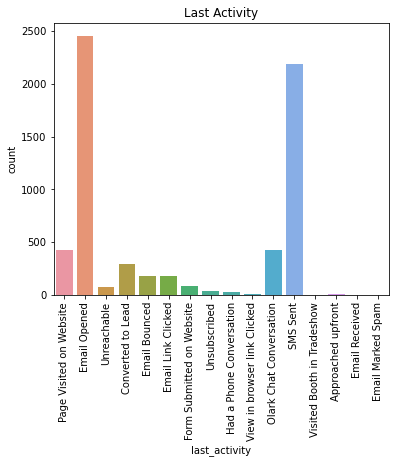

In [1028]:
plt.figure(figsize=[6,5])
sns.countplot(lead_df["last_activity"]).tick_params(axis='x', rotation = 90)
plt.title("Last Activity")
plt.show()

### Insights :
Highest lead generated from "Email Opened" and "SMS Sent" activity.

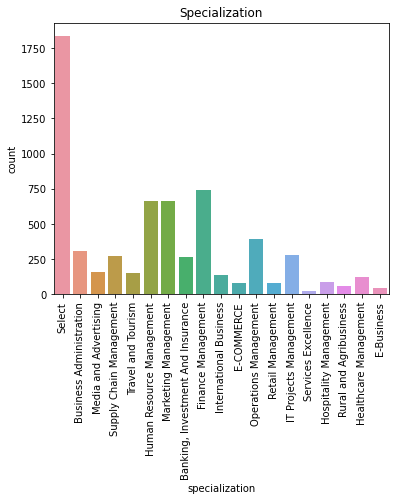

In [1029]:
plt.figure(figsize=[6,5])
sns.countplot(lead_df["specialization"]).tick_params(axis='x', rotation = 90)
plt.title("Specialization")
plt.show()

### Insights :
Highest lead generated from "Management" Specialization.

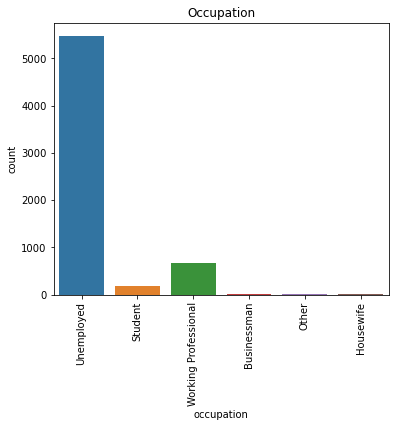

In [1030]:
plt.figure(figsize=[6,5])
sns.countplot(lead_df["occupation"]).tick_params(axis='x', rotation = 90)
plt.title("Occupation")
plt.show()

### Insights :
Highest lead generated from "Unemployed people" and "Working Professionals".

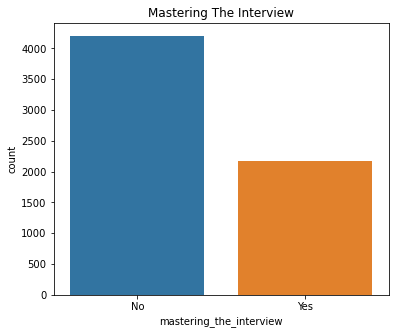

In [1031]:
plt.figure(figsize=[6,5])
sns.countplot(lead_df["mastering_the_interview"])
plt.title("Mastering The Interview")
plt.show()

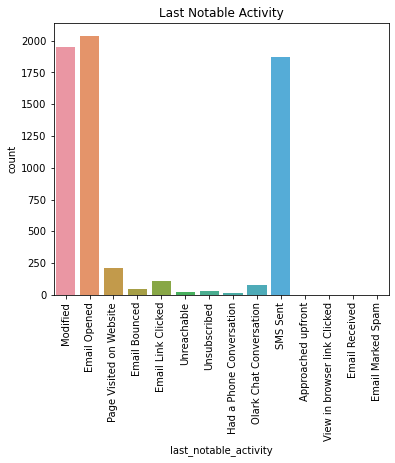

In [1032]:
plt.figure(figsize=[6,5])
sns.countplot(lead_df["last_notable_activity"]).tick_params(axis='x', rotation = 90)
plt.title("Last Notable Activity")
plt.show()

### Insights :
Highest lead generated from "Email Opened" and "SMS Sent" activity.

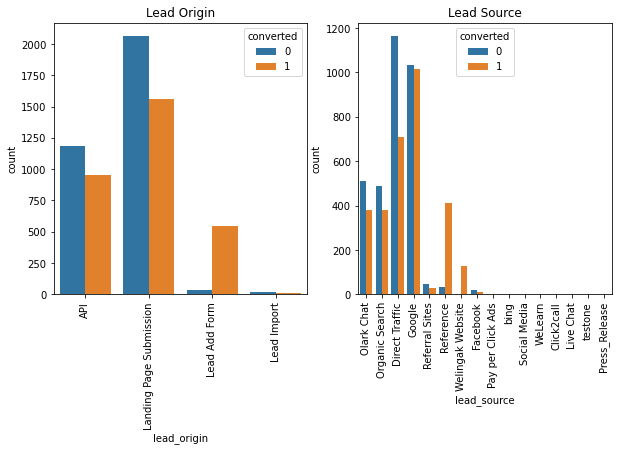

In [1033]:
# let's visualise the categorical variables with converted variable

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.countplot(x="lead_origin", hue="converted", data=lead_df).tick_params(axis='x', rotation = 90)
plt.title("Lead Origin")

plt.subplot(1,2,2)
sns.countplot(x="lead_source", hue="converted", data=lead_df).tick_params(axis='x', rotation = 90)
plt.title("Lead Source")
plt.show()

### Insights:
1. The conversion rate is high in "Lead Add From" Origin.
2. The conversion rate is high in "Reference" Source.

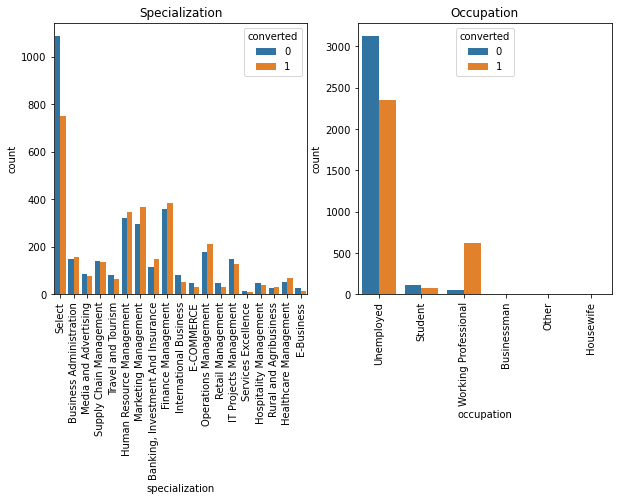

In [1034]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.countplot(x="specialization", hue="converted", data=lead_df).tick_params(axis='x', rotation = 90)
plt.title("Specialization")

plt.subplot(1,2,2)
sns.countplot(x="occupation", hue="converted", data=lead_df).tick_params(axis='x', rotation = 90)
plt.title("Occupation")
plt.show()

### Insights:
1. The conversion rate is high in all "Management" specialization.
2. The conversion rate is high with "Working Professionals occupation.

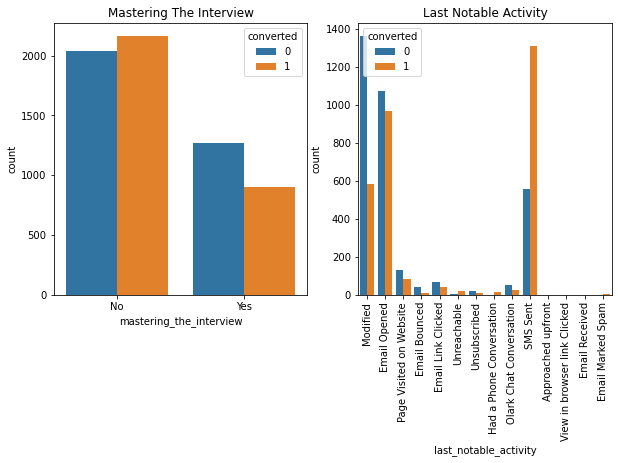

In [1035]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.countplot(x="mastering_the_interview", hue="converted", data=lead_df)
plt.title("Mastering The Interview")

plt.subplot(1,2,2)
sns.countplot(x="last_notable_activity", hue="converted", data=lead_df).tick_params(axis='x', rotation = 90)
plt.title("Last Notable Activity")
plt.show()

### Insights:
The conversion rate is high in "SMS Sent" actibvity.

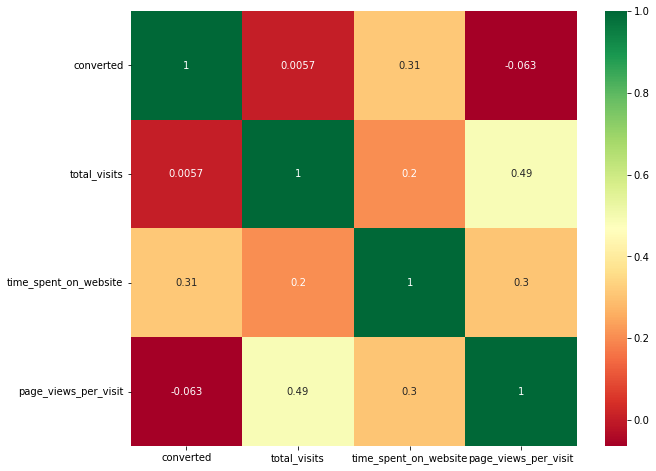

In [1036]:
# let's check the correation among the variables
plt.figure(figsize=[10,8])
sns.heatmap(lead_df.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Insights :
The above heatmap is showing that there are no highly correlated variables present in the dataset.

## Step 4: Data Preparation
- Encoding:
  1. Converting binary vars to 1/0
  2. Other categorical vars to dummy vars
- Splitting into train and test
- Rescaling of variable

### 4.1 Converting binary vars to 1/0 :

In [1037]:
lead_df["mastering_the_interview"].value_counts()

No     4202
Yes    2171
Name: mastering_the_interview, dtype: int64

In [1038]:
# let's convert convert them to 1/0

binarylist = ["mastering_the_interview"]

def binary_map(x):
    return x.map({"Yes":1, "No":0})

In [1039]:
lead_df[binarylist] = lead_df[binarylist].apply(binary_map)

lead_df.head()

,lead_origin,lead_source,converted,total_visits,time_spent_on_website,page_views_per_visit,last_activity,specialization,occupation,mastering_the_interview,last_notable_activity
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,0,Modified


### 4.2 Creating the Dummy Variables :

In [1040]:
# let's check the object type variables

obj_type = lead_df.loc[:, lead_df.dtypes == "object"]
obj_type.columns

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'occupation', 'last_notable_activity'],
      dtype='object')

In [1041]:
# let's create dummy variables 

dummy = pd.get_dummies(lead_df[["lead_origin", "lead_source", "last_activity",
                               "occupation", "last_notable_activity"]], drop_first=True)

lead_df = pd.concat([lead_df, dummy], axis=1)

In [1042]:
lead_df.head()

,lead_origin,lead_source,converted,total_visits,time_spent_on_website,page_views_per_visit,last_activity,specialization,occupation,mastering_the_interview,last_notable_activity,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_WeLearn,lead_source_Welingak Website,lead_source_bing,lead_source_testone,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View in browser link Clicked,last_activity_Visited Booth in Tradeshow,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Select,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1043]:
# let's create a dummy variable for "specialization" variable

dummy_sp = pd.get_dummies(lead_df["specialization"], prefix="Specialization")
dummy_sp = dummy_sp.drop(["Specialization_Select"], 1)
lead_df = pd.concat([lead_df, dummy_sp], axis=1)

In [1044]:
# let's check the data set

lead_df.head()

,lead_origin,lead_source,converted,total_visits,time_spent_on_website,page_views_per_visit,last_activity,specialization,occupation,mastering_the_interview,last_notable_activity,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_WeLearn,lead_source_Welingak Website,lead_source_bing,lead_source_testone,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View in browser link Clicked,last_activity_Visited Booth in Tradeshow,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Select,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1045]:
# let's drop the original variables for which the dummy variables have been created

lead_df = lead_df.drop(["lead_origin", "lead_source", "last_activity", "specialization", "occupation", "last_notable_activity"],1)


In [1046]:
lead_df.head()

,converted,total_visits,time_spent_on_website,page_views_per_visit,mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_WeLearn,lead_source_Welingak Website,lead_source_bing,lead_source_testone,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View in browser link Clicked,last_activity_Visited Booth in Tradeshow,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.00,1532,2.00,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.00,1428,1.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1047]:
lead_df.shape

(6373, 74)

In [1048]:
lead_df.size

471602

### 4.3 Splitting the Data into Train & Test sets :

In [1049]:
# importing the required library

from sklearn.model_selection import train_test_split

In [1050]:
# putting all variables in X

X = lead_df.drop(["converted"], 1)
X.head()

,total_visits,time_spent_on_website,page_views_per_visit,mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_WeLearn,lead_source_Welingak Website,lead_source_bing,lead_source_testone,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View in browser link Clicked,last_activity_Visited Booth in Tradeshow,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.00,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.00,674,2.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.00,1532,2.00,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,305,1.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.00,1428,1.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1051]:
# putting target variable in y

y = lead_df["converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [1052]:
# let's split the data set into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)


### 4.4 Re-scaling the Features

In [1053]:
# importing the required libraries

from sklearn.preprocessing import MinMaxScaler

In [1054]:
# instantiate an object
scaler = MinMaxScaler()

# fit on the data
X_train[["total_visits", "page_views_per_visit", "time_spent_on_website"]] = scaler.fit_transform(X_train[["total_visits", "page_views_per_visit", "time_spent_on_website"]])
X_train.head()

,total_visits,time_spent_on_website,page_views_per_visit,mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_WeLearn,lead_source_Welingak Website,lead_source_bing,lead_source_testone,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View in browser link Clicked,last_activity_Visited Booth in Tradeshow,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.02,0.03,0.12,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.02,0.08,0.25,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.02,0.03,0.38,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1055]:
X_train.describe()

,total_visits,time_spent_on_website,page_views_per_visit,mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_WeLearn,lead_source_Welingak Website,lead_source_bing,lead_source_testone,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View in browser link Clicked,last_activity_Visited Booth in Tradeshow,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00,4461.00
mean,0.01,0.23,0.15,0.34,0.56,0.09,0.00,0.29,0.00,0.32,0.00,0.14,0.14,0.00,0.00,0.07,0.01,0.00,0.00,0.02,0.00,0.00,0.05,0.03,0.03,0.00,0.39,0.00,0.01,0.00,0.06,0.07,0.34,0.01,0.01,0.00,0.00,0.00,0.00,0.03,0.86,0.10,0.01,0.02,0.00,0.32,0.00,0.00,0.31,0.01,0.03,0.29,0.00,0.01,0.00,0.04,0.05,0.01,0.01,0.12,0.02,0.01,0.11,0.04,0.02,0.10,0.02,0.06,0.01,0.01,0.00,0.04,0.02
std,0.02,0.25,0.13,0.47,0.50,0.29,0.06,0.45,0.06,0.47,0.02,0.35,0.35,0.01,0.01,0.26,0.11,0.00,0.01,0.14,0.02,0.01,0.22,0.16,0.17,0.00,0.49,0.01,0.11,0.06,0.24,0.25,0.47,0.10,0.08,0.03,0.01,0.04,0.05,0.17,0.34,0.30,0.09,0.14,0.00,0.47,0.00,0.05,0.46,0.11,0.18,0.45,0.06,0.07,0.01,0.20,0.22,0.09,0.11,0.32,0.14,0.11,0.31,0.21,0.15,0.31,0.15,0.23,0.12,0.09,0.05,0.20,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.

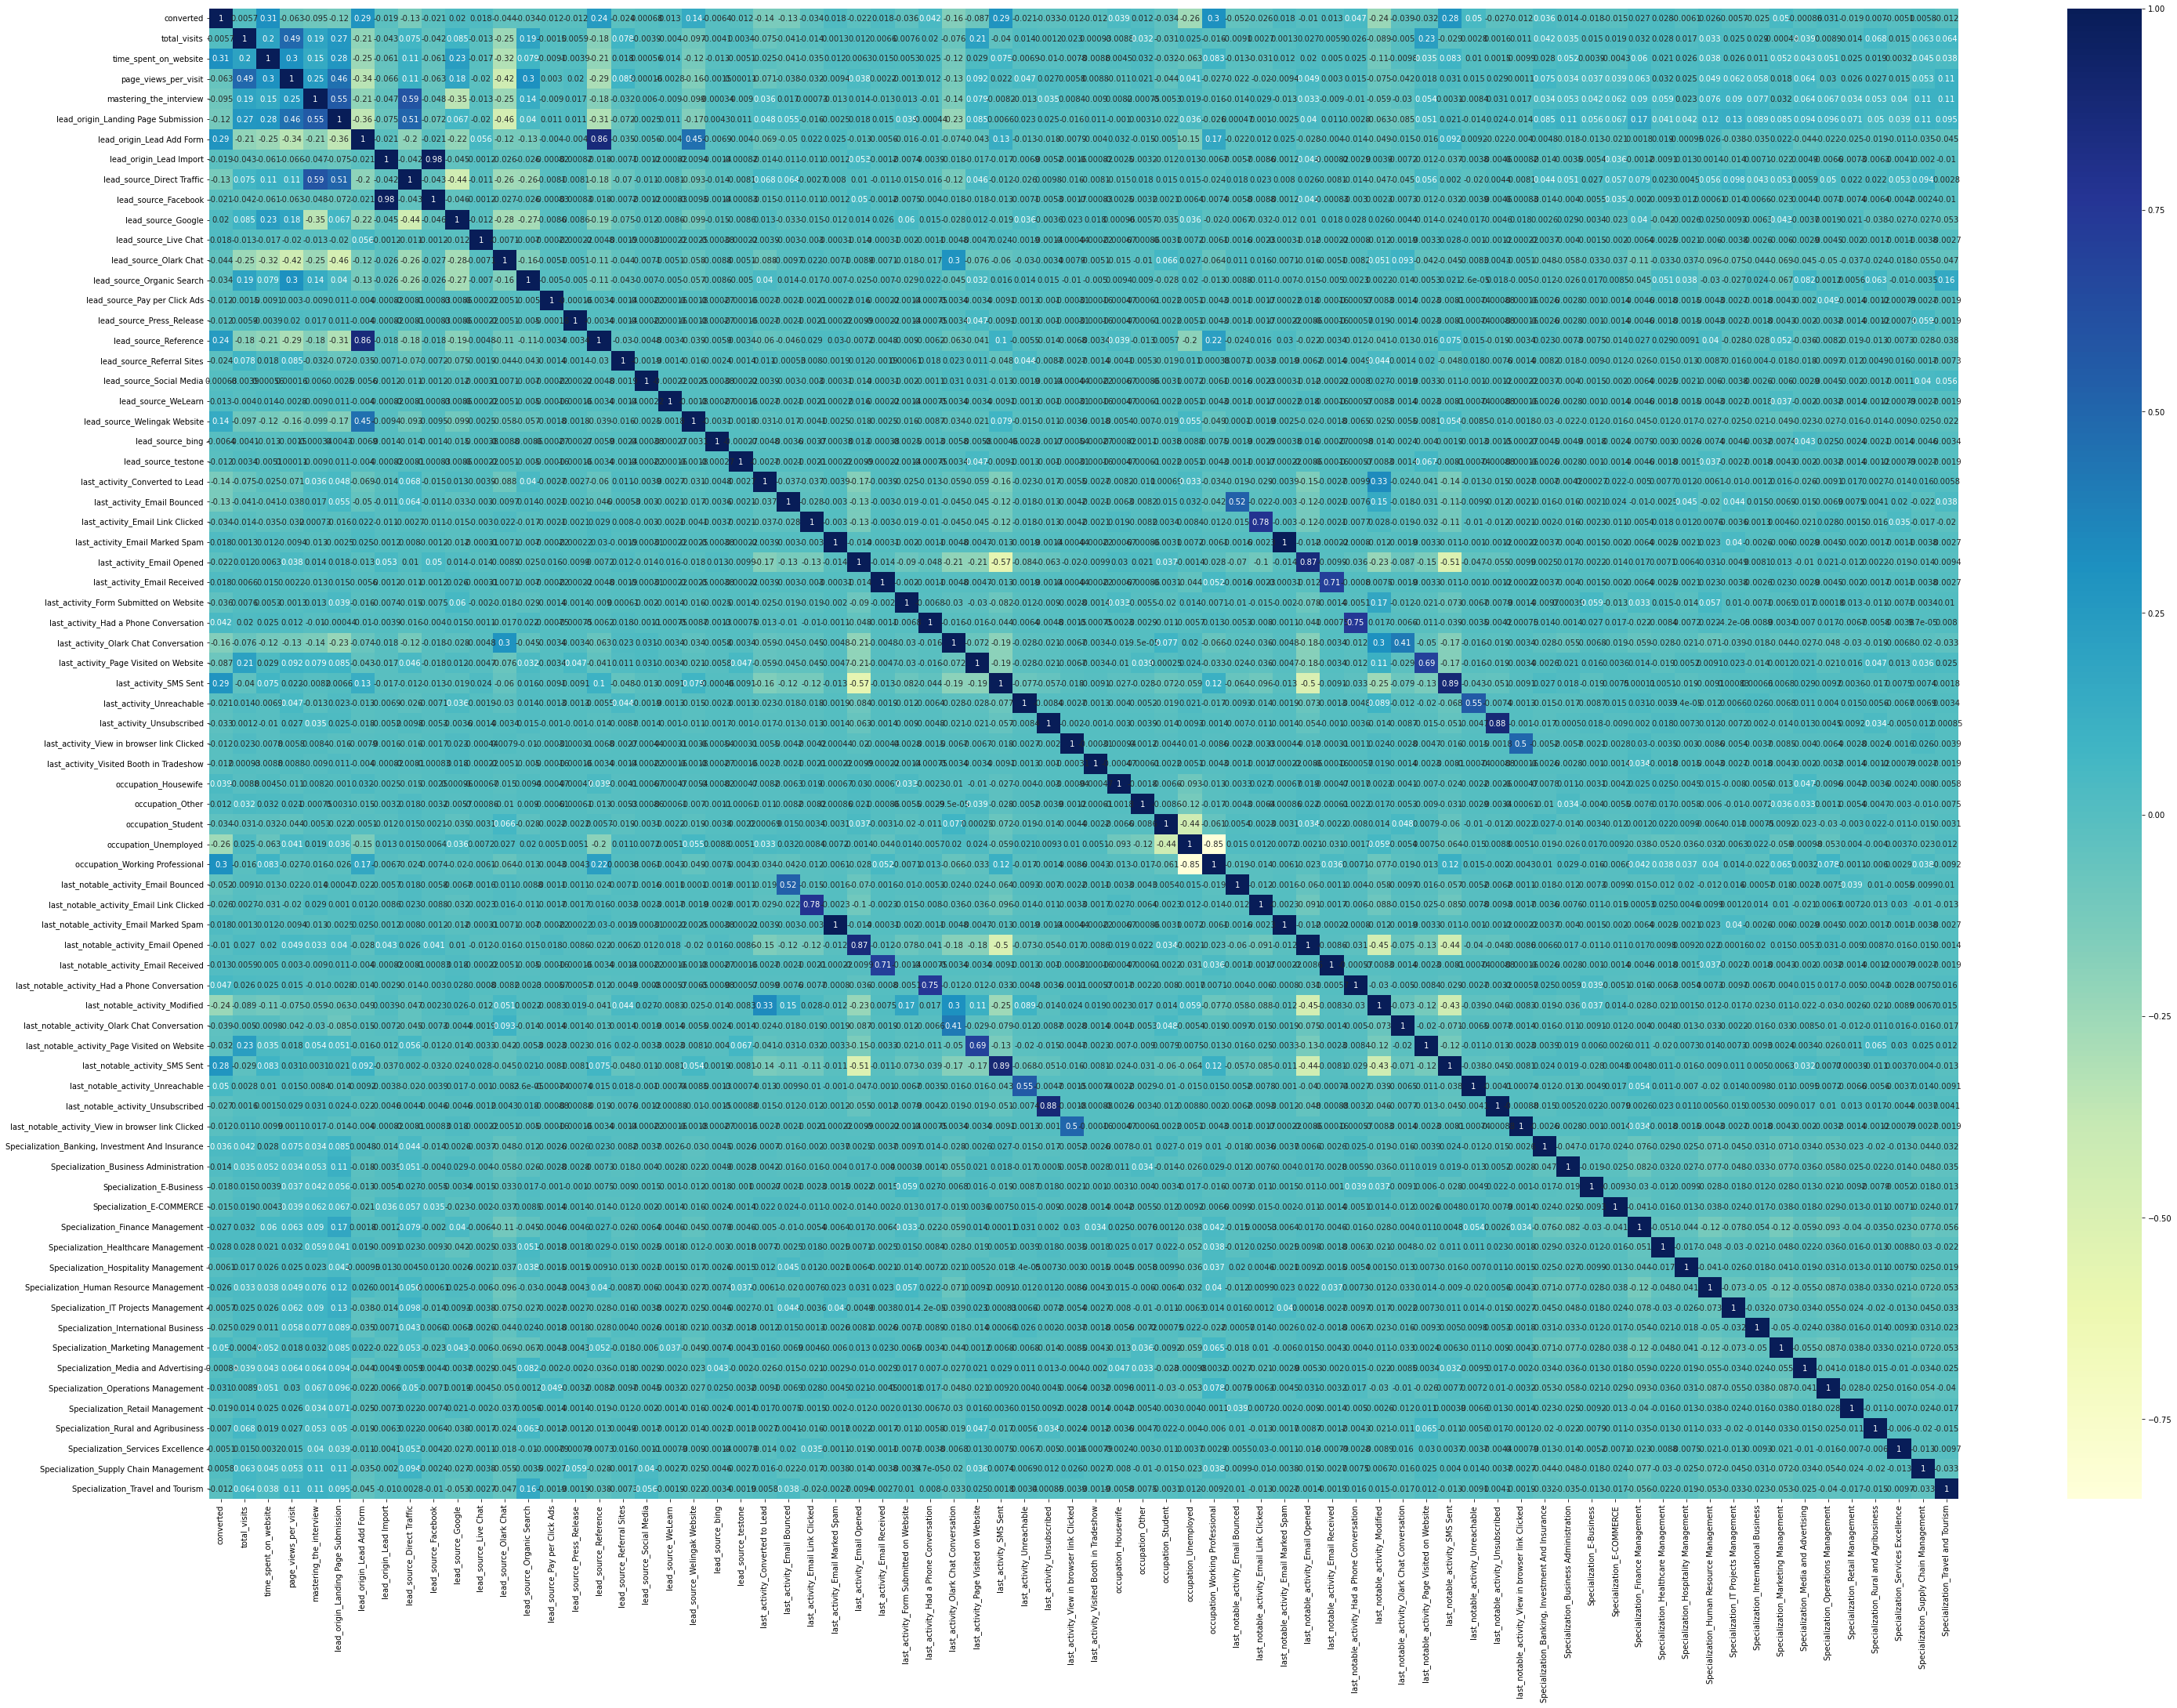

In [1056]:
# let's check the correlation between the variables

plt.figure(figsize=[50,35])
sns.heatmap(lead_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Insights :
The above heatmap is not easy to interpret since there are a a lot of variables so it's difficult find highly correlated variables.

## Step 5: Model Building
### Using RFE & Statsmodel methods for Optimun model :

In [1057]:
# importing the RFE & LinearRegresssion

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1058]:
# Running RFE with the output number of the variable equal to 15

lr = LogisticRegression()
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [1059]:
# let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('total_visits', True, 1),
 ('time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 19),
 ('mastering_the_interview', False, 49),
 ('lead_origin_Landing Page Submission', False, 6),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 53),
 ('lead_source_Direct Traffic', False, 20),
 ('lead_source_Facebook', False, 50),
 ('lead_source_Google', False, 35),
 ('lead_source_Live Chat', False, 40),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 34),
 ('lead_source_Pay per Click Ads', False, 39),
 ('lead_source_Press_Release', False, 43),
 ('lead_source_Reference', True, 1),
 ('lead_source_Referral Sites', False, 36),
 ('lead_source_Social Media', False, 58),
 ('lead_source_WeLearn', False, 38),
 ('lead_source_Welingak Website', True, 1),
 ('lead_source_bing', False, 28),
 ('lead_source_testone', False, 37),
 ('last_activity_Converted to Lead', False, 26),
 ('last_activity_Email Bounced', True, 1),
 ('last_activity_Email Lin

In [1060]:
# let's put all the columns selected by RFE in the variable "col"

col = X_train.columns[rfe.support_]
col

Index(['total_visits', 'time_spent_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Reference',
       'lead_source_Welingak Website', 'last_activity_Email Bounced',
       'last_activity_Had a Phone Conversation', 'last_activity_SMS Sent',
       'occupation_Housewife', 'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional',
       'last_notable_activity_Had a Phone Conversation',
       'last_notable_activity_Unreachable'],
      dtype='object')

In [1061]:
# let's select only the columns selected by RFE

X_train_rfe = X_train[col]

In [1062]:
X_train.columns[~rfe.support_]

Index(['page_views_per_visit', 'mastering_the_interview',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Import',
       'lead_source_Direct Traffic', 'lead_source_Facebook',
       'lead_source_Google', 'lead_source_Live Chat',
       'lead_source_Organic Search', 'lead_source_Pay per Click Ads',
       'lead_source_Press_Release', 'lead_source_Referral Sites',
       'lead_source_Social Media', 'lead_source_WeLearn', 'lead_source_bing',
       'lead_source_testone', 'last_activity_Converted to Lead',
       'last_activity_Email Link Clicked', 'last_activity_Email Marked Spam',
       'last_activity_Email Opened', 'last_activity_Email Received',
       'last_activity_Form Submitted on Website',
       'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website', 'last_activity_Unreachable',
       'last_activity_Unsubscribed',
       'last_activity_View in browser link Clicked',
       'last_activity_Visited Booth in Tradeshow', 'occupation_

### Building model using statsmodel for the detailed statistics

### Model 1:

In [1063]:
# importing the required library
import statsmodels.api as sm

In [1064]:
# Fit a logistic Regression model after adding a constant.

X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.4
Date:                Sun, 10 Jul 2022   Deviance:                       4188.8
Time:                        00:21:05   Pearson chi2:                 4.92e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0318      0.610     -1.692      0.091      -2.227       0.163
total_visits                                       9.6750      2.784      3.476      0.001       4.219      15.131
time_spent_on_website                              4.4599      0.184     24.201      0.000       4.099       4.821
lead_origin_Lead Add Form                          2.9836      1.187      2.513      0.012       0.657       5.311
lead_source_Olark Chat                             1.4640      0.122     11.997      0.000       1.225       1.703
lead_source_Reference                              1.2246      1.210      1.012      0.312      -1.147       3.596
lead_source_Welingak Website                       3.2963      1.555      2.120      0.034       0.249       6.343
last_activity_Email Bounced                       -1.6916      0.366     -4.625      0.000      -2.409      -0.975
last_activity_Had a Phone Conversation             1.0754      0.984      1.093      0.274      -0.853       3.004
last_activity_SMS Sent                             1.1088      0.082     13.585      0.000       0.949       1.269
occupation_Housewife                              22.6894   2.45e+04      0.001      0.999   -4.79e+04     4.8e+04
occupation_Student                                -1.1259      0.639     -1.762      0.078      -2.379       0.127
occupation_Unemployed                             -1.3232      0.604     -2.190      0.029      -2.507      -0.139
occupation_Working Professional                    1.2999      0.633      2.055      0.040       0.060       2.540
last_notable_activity_Had a Phone Conversation    23.2092   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
last_notable_activity_Unreachable                  2.8181      0.807      3.491      0.000       1.236       4.400
==================================================================================================================
"""

In [1065]:
X_train_rfe.columns

Index(['total_visits', 'time_spent_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Reference',
       'lead_source_Welingak Website', 'last_activity_Email Bounced',
       'last_activity_Had a Phone Conversation', 'last_activity_SMS Sent',
       'occupation_Housewife', 'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional',
       'last_notable_activity_Had a Phone Conversation',
       'last_notable_activity_Unreachable'],
      dtype='object')

In [1066]:
# importing "variance_inflation_factor"

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1067]:
#Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,lead_origin_Lead Add Form,84.18
4,lead_source_Reference,65.18
5,lead_source_Welingak Website,20.03
11,occupation_Unemployed,3.65
7,last_activity_Had a Phone Conversation,2.44
13,last_notable_activity_Had a Phone Conversation,2.43
1,time_spent_on_website,2.37
0,total_visits,1.62
8,last_activity_SMS Sent,1.61
12,occupation_Working Professional,1.57


### Insights :
- Dropping the variable "lead_source_Reference" as it has high VIF value as well as p-value.

### Model 2:

In [1068]:
X_train_rfe = X_train_rfe.drop(["lead_source_Reference"], axis=1)

In [1069]:
# Refit the model with new features

X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.8
Date:                Sun, 10 Jul 2022   Deviance:                       4189.7
Time:                        00:21:06   Pearson chi2:                 4.90e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0312      0.610     -1.692      0.091      -2.226       0.164
total_visits                                       9.6751      2.784      3.476      0.001       4.219      15.131
time_spent_on_website                              4.4600      0.184     24.200      0.000       4.099       4.821
lead_origin_Lead Add Form                          4.1703      0.258     16.139      0.000       3.664       4.677
lead_source_Olark Chat                             1.4640      0.122     11.996      0.000       1.225       1.703
lead_source_Welingak Website                       2.1096      1.036      2.036      0.042       0.079       4.141
last_activity_Email Bounced                       -1.6917      0.366     -4.625      0.000      -2.409      -0.975
last_activity_Had a Phone Conversation             1.0753      0.984      1.093      0.274      -0.853       3.004
last_activity_SMS Sent                             1.1087      0.082     13.583      0.000       0.949       1.269
occupation_Housewife                              22.6911   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
occupation_Student                                -1.1253      0.639     -1.761      0.078      -2.378       0.127
occupation_Unemployed                             -1.3237      0.604     -2.191      0.028      -2.508      -0.140
occupation_Working Professional                    1.3004      0.633      2.056      0.040       0.061       2.540
last_notable_activity_Had a Phone Conversation    23.2095   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
last_notable_activity_Unreachable                  2.8184      0.807      3.492      0.000       1.236       4.400
==================================================================================================================
"""

In [1070]:
X_train_rfe.columns

Index(['total_visits', 'time_spent_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Welingak Website',
       'last_activity_Email Bounced', 'last_activity_Had a Phone Conversation',
       'last_activity_SMS Sent', 'occupation_Housewife', 'occupation_Student',
       'occupation_Unemployed', 'occupation_Working Professional',
       'last_notable_activity_Had a Phone Conversation',
       'last_notable_activity_Unreachable'],
      dtype='object')

In [1071]:
#Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
10,occupation_Unemployed,3.65
6,last_activity_Had a Phone Conversation,2.44
12,last_notable_activity_Had a Phone Conversation,2.43
1,time_spent_on_website,2.37
2,lead_origin_Lead Add Form,1.71
0,total_visits,1.62
7,last_activity_SMS Sent,1.61
11,occupation_Working Professional,1.56
3,lead_source_Olark Chat,1.44
4,lead_source_Welingak Website,1.33


### Insights :
- Now the VIF values are less than 5. so let's focus on high p-value variables and drop them one by one.
- Dropping the variable "last_notable_activity_Had a Phone Conversation" as it has high p-value.

### Model 3:

In [1072]:
X_train_rfe = X_train_rfe.drop(["last_notable_activity_Had a Phone Conversation"], axis=1)

In [1073]:
# Refit the model with new features

X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.7
Date:                Sun, 10 Jul 2022   Deviance:                       4195.5
Time:                        00:21:06   Pearson chi2:                 4.91e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0332      0.609     -1.695      0.090      -2.228       0.161
total_visits                               9.8018      2.787      3.517      0.000       4.340      15.263
time_spent_on_website                      4.4525      0.184     24.176      0.000       4.092       4.813
lead_origin_Lead Add Form                  4.1704      0.258     16.139      0.000       3.664       4.677
lead_source_Olark Chat                     1.4640      0.122     11.995      0.000       1.225       1.703
lead_source_Welingak Website               2.1095      1.036      2.036      0.042       0.078       4.141
last_activity_Email Bounced               -1.6906      0.366     -4.623      0.000      -2.407      -0.974
last_activity_Had a Phone Conversation     2.8017      0.802      3.494      0.000       1.230       4.373
last_activity_SMS Sent                     1.1086      0.082     13.586      0.000       0.949       1.269
occupation_Housewife                      21.6929   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
occupation_Student                        -1.1232      0.639     -1.758      0.079      -2.375       0.129
occupation_Unemployed                     -1.3218      0.604     -2.189      0.029      -2.505      -0.138
occupation_Working Professional            1.3003      0.632      2.056      0.040       0.061       2.540
last_notable_activity_Unreachable          2.8174      0.807      3.491      0.000       1.235       4.399
==========================================================================================================
"""

In [1074]:
X_train_rfe.columns

Index(['total_visits', 'time_spent_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Welingak Website',
       'last_activity_Email Bounced', 'last_activity_Had a Phone Conversation',
       'last_activity_SMS Sent', 'occupation_Housewife', 'occupation_Student',
       'occupation_Unemployed', 'occupation_Working Professional',
       'last_notable_activity_Unreachable'],
      dtype='object')

In [1075]:
#Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
10,occupation_Unemployed,3.65
1,time_spent_on_website,2.37
2,lead_origin_Lead Add Form,1.71
0,total_visits,1.62
7,last_activity_SMS Sent,1.61
11,occupation_Working Professional,1.56
3,lead_source_Olark Chat,1.44
4,lead_source_Welingak Website,1.33
9,occupation_Student,1.09
5,last_activity_Email Bounced,1.05


### Insights :
- Dropping the variable "occupation_Housewife" as it has high p-value.

### Model 4 :

In [1076]:
X_train_rfe = X_train_rfe.drop(["occupation_Housewife"], axis=1)

In [1077]:
# Refit the model with new features

X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.0
Date:                Sun, 10 Jul 2022   Deviance:                       4200.0
Time:                        00:21:06   Pearson chi2:                 4.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.4561      0.558     -0.817      0.414      -1.551       0.638
total_visits                               9.5775      2.773      3.454      0.001       4.143      15.012
time_spent_on_website                      4.4513      0.184     24.179      0.000       4.090       4.812
lead_origin_Lead Add Form                  4.1675      0.258     16.136      0.000       3.661       4.674
lead_source_Olark Chat                     1.4586      0.122     11.966      0.000       1.220       1.698
lead_source_Welingak Website               2.1078      1.036      2.034      0.042       0.077       4.139
last_activity_Email Bounced               -1.6917      0.366     -4.626      0.000      -2.408      -0.975
last_activity_Had a Phone Conversation     2.8034      0.802      3.497      0.000       1.232       4.375
last_activity_SMS Sent                     1.1082      0.082     13.583      0.000       0.948       1.268
occupation_Student                        -1.6956      0.592     -2.863      0.004      -2.856      -0.535
occupation_Unemployed                     -1.8940      0.554     -3.417      0.001      -2.980      -0.808
occupation_Working Professional            0.7277      0.585      1.244      0.214      -0.419       1.874
last_notable_activity_Unreachable          2.8147      0.807      3.486      0.000       1.232       4.397
==========================================================================================================
"""

In [1078]:
X_train_rfe.columns

Index(['total_visits', 'time_spent_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Welingak Website',
       'last_activity_Email Bounced', 'last_activity_Had a Phone Conversation',
       'last_activity_SMS Sent', 'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional', 'last_notable_activity_Unreachable'],
      dtype='object')

In [1079]:
#Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
9,occupation_Unemployed,3.64
1,time_spent_on_website,2.36
2,lead_origin_Lead Add Form,1.70
0,total_visits,1.62
7,last_activity_SMS Sent,1.61
10,occupation_Working Professional,1.56
3,lead_source_Olark Chat,1.43
4,lead_source_Welingak Website,1.33
8,occupation_Student,1.09
5,last_activity_Email Bounced,1.05


### Insights:
- Dropping the variable "occupation_Working Professional" as it has high p-value

### Model 5:

In [1080]:
X_train_rfe = X_train_rfe.drop(["occupation_Working Professional"], axis=1)

In [1081]:
# Refit the model with new features

X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.7
Date:                Sun, 10 Jul 2022   Deviance:                       4201.5
Time:                        00:21:06   Pearson chi2:                 4.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2044      0.196      1.042      0.297      -0.180       0.589
total_visits                               9.4577      2.766      3.419      0.001       4.037      14.879
time_spent_on_website                      4.4526      0.184     24.184      0.000       4.092       4.813
lead_origin_Lead Add Form                  4.1672      0.258     16.137      0.000       3.661       4.673
lead_source_Olark Chat                     1.4582      0.122     11.969      0.000       1.219       1.697
lead_source_Welingak Website               2.1066      1.036      2.033      0.042       0.076       4.138
last_activity_Email Bounced               -1.6834      0.365     -4.616      0.000      -2.398      -0.969
last_activity_Had a Phone Conversation     2.8075      0.802      3.502      0.000       1.236       4.379
last_activity_SMS Sent                     1.1117      0.081     13.644      0.000       0.952       1.271
occupation_Student                        -2.3554      0.280     -8.420      0.000      -2.904      -1.807
occupation_Unemployed                     -2.5542      0.186    -13.761      0.000      -2.918      -2.190
last_notable_activity_Unreachable          2.8162      0.807      3.488      0.000       1.234       4.399
==========================================================================================================
"""

In [1082]:
X_train_rfe.columns

Index(['total_visits', 'time_spent_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Welingak Website',
       'last_activity_Email Bounced', 'last_activity_Had a Phone Conversation',
       'last_activity_SMS Sent', 'occupation_Student', 'occupation_Unemployed',
       'last_notable_activity_Unreachable'],
      dtype='object')

In [1083]:
#Check for the VIF values of the feature variables. 

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
9,occupation_Unemployed,2.81
1,time_spent_on_website,2.00
0,total_visits,1.54
7,last_activity_SMS Sent,1.52
2,lead_origin_Lead Add Form,1.45
3,lead_source_Olark Chat,1.33
4,lead_source_Welingak Website,1.30
8,occupation_Student,1.07
5,last_activity_Email Bounced,1.04
6,last_activity_Had a Phone Conversation,1.01


### Insights :
- The Model 5 has significant p-values <0.05
- The multicollinearity between the predictor variables is also low i.e VIF value <5.
- Model 5 has all required values under significant range.
- We took this model 5 for further analysis as final optimum model

## Step 6: Model Evaluation
### Making Predictions :

In [1084]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred.head(10)

8003   0.28
218    0.14
4171   0.12
4037   0.29
3660   0.95
207    0.19
2044   0.18
6411   0.95
6498   0.06
2085   0.98
dtype: float64

In [1085]:
# Reshaping the probabilities into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27766695, 0.1379242 , 0.12229282, 0.29076236, 0.94926508,
       0.18849228, 0.17546212, 0.94867887, 0.06409252, 0.98061944])

In [1086]:
# create a new dataframe containing the actual conversion flag and the probabilities predicted by the final model

y_train_pred_final = pd.DataFrame({"converted" : y_train.values, "conversion_prob": y_train_pred})
y_train_pred_final

,converted,conversion_prob
0,0,0.28
1,0,0.14
2,1,0.12
3,1,0.29
4,1,0.95
...,...,...
4456,1,0.95
4457,0,0.75
4458,0,0.90
4459,0,0.20


In [1087]:
# let's create a new column predicted with 1 if conversion prob > 0.5 else 0

y_train_pred_final["Predicted"] = y_train_pred_final.conversion_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,conversion_prob,Predicted
0,0,0.28,0
1,0,0.14,0
2,1,0.12,0
3,1,0.29,0
4,1,0.95,1


### 6.1 Confusion Matrix :

In [1088]:
# importing the required library
from sklearn import metrics

In [1089]:
# let's create a confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.converted,y_train_pred_final.Predicted)
print(confusion)

[[1927  385]
 [ 561 1588]]


In [1090]:
# Actual/Predicted  non-converted converted
# non-converted         1929         383
# converted              560         1589

In [1091]:
# let's check the overall accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Predicted)
print(accuracy)

0.787939923783905


In [1092]:
# let's check the other metics as well

TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity :

In [1093]:
# let's calculate the sensitivity
TP/(TP+FN)

0.7389483480688692

### Specificity :

In [1094]:
# let's calculate the specificity

TN/(TN+FP)

0.8334775086505191

### False Positive Rate :

In [1095]:
# let's calculate the false positive rate (predicting converted when customer does not have converted)

FP/(TN+FP)

0.16652249134948097

### Positive Predicted Value :

In [1096]:
# let's calculate the positive predictive value

TP/(TP+FP)

0.8048656867714141

### Negative Predicted Value :

In [1097]:
# let's calculate the negative predictive value

TN/(TN+FN)

0.7745176848874598

### 6.2 Optimal Cutoff :

In [1098]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate= False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=[6,5])
    plt.plot(fpr, tpr, label = "ROC curve(area = %0.2f)" % auc_score)
    plt.plot([0,1],[0,1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1- True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics Example")
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [1099]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.converted, y_train_pred_final.conversion_prob, drop_intermediate=False)

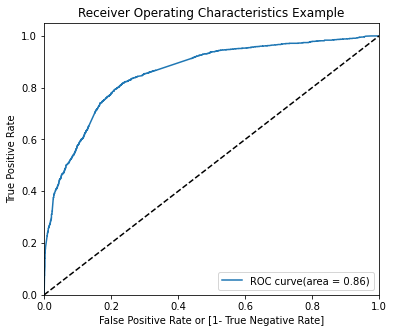

In [1100]:
# let's call the ROC Function

draw_roc(y_train_pred_final.converted, y_train_pred_final.conversion_prob)

### Insights :
- The above curve showing that the area under the curve of the ROC is 0.86 which is quite good so this model seems to be good model.

In [1101]:
# let's create columns with different probability cutoffs

numbers = [float(x)/10 for x  in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.conversion_prob.map(lambda x:1 if x > i else 0)

y_train_pred_final.head()


,converted,conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.28,0,1,1,1,0,0,0,0,0,0,0
1,0,0.14,0,1,1,0,0,0,0,0,0,0,0
2,1,0.12,0,1,1,0,0,0,0,0,0,0,0
3,1,0.29,0,1,1,1,0,0,0,0,0,0,0
4,1,0.95,1,1,1,1,1,1,1,1,1,1,1


In [1102]:
# let's create a datframe to see the values of accuracy, sensitivity and specificity at different values of probability

cutoff_dataframe = pd.DataFrame(columns=["prob", "accuracy", "sensitivity", "specificity"])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] = true positive
# TN = confusion[0,0] = true negative
# FP = confusion[0,1] = false positive
# FN = confusion[1,0] = false negative

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_dataframe.loc[i] = [i, accuracy, sensitivity, specificity]
print(cutoff_dataframe)

      prob  accuracy  sensitivity  specificity
0.00  0.00      0.48         1.00         0.00
0.10  0.10      0.51         0.99         0.07
0.20  0.20      0.69         0.95         0.46
0.30  0.30      0.77         0.86         0.68
0.40  0.40      0.79         0.80         0.78
0.50  0.50      0.79         0.74         0.83
0.60  0.60      0.76         0.62         0.88
0.70  0.70      0.73         0.54         0.91
0.80  0.80      0.71         0.45         0.95
0.90  0.90      0.64         0.28         0.98


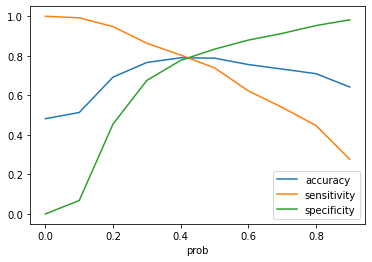

In [1103]:
# let's plot it

cutoff_dataframe.plot.line(x="prob", y=["accuracy", "sensitivity", "specificity"])
plt.show()

### Insights :
- The above plot clearly showing that the optimal values of the three metrics lies around 0.42. So let's choose 0.42 as our cutoff now.

In [1104]:
y_train_pred_final["final_predicted"] = y_train_pred_final.conversion_prob.map(lambda x:1 if x>0.42 else 0)
y_train_pred_final.head()

,converted,conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.28,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.14,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.12,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.29,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.95,1,1,1,1,1,1,1,1,1,1,1,1


In [1105]:
# let's check the accuracy 

metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)


0.7901815736381977

In [1106]:
# let's check the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted)
confusion2

array([[1830,  482],
       [ 454, 1695]], dtype=int64)

In [1107]:
# let's check the other metics as well

TP = confusion2[1,1] #true positive
TN = confusion2[0,0] #true negative
FP = confusion2[0,1] #false positive
FN = confusion2[1,0] #false negative


In [1108]:
# calculate sensitivity

TP/(TP+FN)

0.7887389483480689

In [1109]:
# calculate specificity

TN/(TN+FP)

0.7915224913494809

### Insights :
- From above value of Sensitivity and Specificity we can say this cutoff point seems good to go.

## Step 7 : Making Predictions On Data Set
### 7.1 Making Predictions On The Test Set :

In [1110]:
# let's scale the test set as well

X_test[["total_visits", "time_spent_on_website", "page_views_per_visit"]] = scaler.fit_transform(X_test[["total_visits", "time_spent_on_website", "page_views_per_visit"]])

In [1111]:
# let's select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,total_visits,time_spent_on_website,lead_origin_Lead Add Form,lead_source_Olark Chat,lead_source_Reference,lead_source_Welingak Website,last_activity_Email Bounced,last_activity_Had a Phone Conversation,last_activity_SMS Sent,occupation_Housewife,occupation_Student,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Had a Phone Conversation,last_notable_activity_Unreachable
4771,0.00,0.00,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.09,0.03,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.05,0.42,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.04,0.38,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,0.11,0.40,0,0,0,0,0,0,1,0,0,1,0,0,0


In [1112]:
# let's add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [1113]:
X_test_sm

,const,total_visits,time_spent_on_website,lead_origin_Lead Add Form,lead_source_Olark Chat,lead_source_Reference,lead_source_Welingak Website,last_activity_Email Bounced,last_activity_Had a Phone Conversation,last_activity_SMS Sent,occupation_Housewife,occupation_Student,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Had a Phone Conversation,last_notable_activity_Unreachable
4771,1.00,0.00,0.00,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.00,0.09,0.03,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.00,0.05,0.42,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.00,0.04,0.38,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,1.00,0.11,0.40,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.00,0.04,0.03,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.00,0.04,0.15,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.00,0.19,0.71,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.00,0.04,0.42,0,0,0,0,0,0,1,0,0,1,0,0,0


In [1114]:
# let's drop the unwanted columns

X_test.drop(["lead_source_Reference", "occupation_Housewife", "occupation_Working Professional", "last_notable_activity_Had a Phone Conversation"],1, inplace=True)

In [1115]:
# let's make a predictions on the test set and store it in the variable

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred.head()

4771   1.00
6122   0.21
9202   0.76
6570   0.70
2668   0.83
dtype: float64

In [1116]:
# let's convert y_pred to dataframe

y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
4771,1.00
6122,0.21
9202,0.76
6570,0.70
2668,0.83


In [1117]:
# let's convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1118]:
# let's remove the index from both dataframes

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)



In [1119]:
# let's append both the dataframes

y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)
y_pred_final.head()

,converted,0
0,1,1.00
1,0,0.21
2,0,0.76
3,1,0.70
4,1,0.83


In [1120]:
# let's rename the column

y_pred_final = y_pred_final.rename(columns={0:"conversion_prob"})
y_pred_final.head()

,converted,conversion_prob
0,1,1.00
1,0,0.21
2,0,0.76
3,1,0.70
4,1,0.83


In [1121]:
# let's make predictions on the test data set using cutoff value 0.42

y_pred_final["final_predicted"] = y_pred_final.conversion_prob.map(lambda x:1 if x>0.42 else 0)


In [1122]:
y_pred_final.head()

,converted,conversion_prob,final_predicted
0,1,1.00,1
1,0,0.21,0
2,0,0.76,1
3,1,0.70,1
4,1,0.83,1


In [1123]:
# let's check the overall accuracy

metrics.accuracy_score(y_pred_final["converted"], y_pred_final.final_predicted)

0.7609832635983264

In [1124]:
confusion3 = metrics.confusion_matrix(y_pred_final["converted"], y_pred_final.final_predicted)
confusion3

array([[693, 303],
       [154, 762]], dtype=int64)

In [1125]:
# let's check the other metics as well

TP = confusion3[1,1] #true positive
TN = confusion3[0,0] #true negative
FP = confusion3[0,1] #false positive
FN = confusion3[1,0] #false negative

In [1126]:
# let's calculate the sensitivity

TP/(TP+FN)

0.8318777292576419

In [1127]:
# let's calculate the specificity

TN/(TN+FP)

0.6957831325301205

### Precision-Recall View :

In [1128]:
# let's create a confusion matrix again

confusion4 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Predicted)
confusion4

array([[1927,  385],
       [ 561, 1588]], dtype=int64)

### Precision :
TP/(TP+FP)

In [1129]:
confusion4[1,1]/(confusion4[0,1]+confusion4[1,1])

0.8048656867714141

### Recall :
TP/TP+FN

In [1130]:
confusion4[1,1]/(confusion4[1,1]+confusion4[1,0])

0.7389483480688692

### Precision & Recall Tradeoff :

In [1131]:
# importing the required library
from sklearn.metrics import precision_recall_curve

In [1132]:
y_train_pred_final.converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [1133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.conversion_prob)

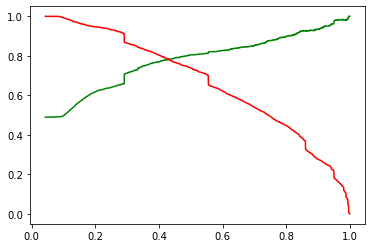

In [1134]:
# let's plot the curve

plt.plot(thresholds, p[:-1], "green")
plt.plot(thresholds, r[:-1], "red")
plt.show()


In [1135]:
# let's add final predicted column

y_train_pred_final["final_predicted"] = y_train_pred_final.conversion_prob.map(lambda x: 1 if x>0.43 else 0)
y_train_pred_final.head()

,converted,conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.28,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.14,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.12,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.29,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.95,1,1,1,1,1,1,1,1,1,1,1,1


In [1136]:
# let's check the accuracy 

metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7901815736381977

In [1137]:
# let's create a confusion matrix once again

confusion5 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted)
confusion5

array([[1840,  472],
       [ 464, 1685]], dtype=int64)

In [1138]:
# let's check the other metics as well

TP = confusion5[1,1] #true positive
TN = confusion5[0,0] #true negative
FP = confusion5[0,1] #false positive
FN = confusion5[1,0] #false negative

In [1139]:
# let's calcualte the precision

TP/(TP+FP)

0.7811775614279092

In [1140]:
# let's calcualte the recall

TP/(TP+FN)

0.7840856212191717

### Insights :
- The above values showing that the cutoff point seems good to go

### 7.2 Making Predictions on the y-Test Set :

In [1141]:
# let's make a predictions on the test data set

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771   1.00
6122   0.21
9202   0.76
6570   0.70
2668   0.83
4233   0.94
3368   0.74
9091   0.65
5972   0.30
3631   0.84
dtype: float64

In [1142]:
# let's convert the y_pred to dataframe

y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
4771,1.00
6122,0.21
9202,0.76
6570,0.70
2668,0.83


In [1143]:
# let's convert the y_test to dataframe

y_test_df = pd.DataFrame(y_test) 

In [1144]:
# let's remove the index from both the dataframe and append them

y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1145]:
# let's append both the dataframe

y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)
y_test_pred_final.head()

,converted,0
0,1,1.00
1,0,0.21
2,0,0.76
3,1,0.70
4,1,0.83


In [1146]:
# let's rename the column

y_test_pred_final = y_test_pred_final.rename(columns={0:"conversion_prob"})

In [1147]:
# let's check the final dataframe

y_test_pred_final.head()

,converted,conversion_prob
0,1,1.00
1,0,0.21
2,0,0.76
3,1,0.70
4,1,0.83


In [1148]:
# let's make predictions on the test data set using cutoff value 0.42

y_test_pred_final["final_predicted"] = y_test_pred_final.conversion_prob.map(lambda x:1 if x>0.42 else 0)

In [1149]:
y_test_pred_final.head()

,converted,conversion_prob,final_predicted
0,1,1.00,1
1,0,0.21,0
2,0,0.76,1
3,1,0.70,1
4,1,0.83,1


In [1150]:
# let's check the overall accuracy

metrics.accuracy_score(y_test_pred_final["converted"], y_test_pred_final.final_predicted)

0.7609832635983264

In [1151]:
# let's create a confusion matrix

confusion6 = metrics.confusion_matrix(y_test_pred_final["converted"], y_test_pred_final.final_predicted)
confusion6

array([[693, 303],
       [154, 762]], dtype=int64)

In [1152]:
# let's check the other metics as well

TP = confusion6[1,1] #true positive
TN = confusion6[0,0] #true negative
FP = confusion6[0,1] #false positive
FN = confusion6[1,0] #false negative

In [1153]:
# let's calculate the precision

TP/(TP+FP)

0.7154929577464789

In [1154]:
# let's calculate the recall

TP/(TP+FN)

0.8318777292576419

## Step 8: Summary

**Major Contributors :**
- As per the model we build here, It was found that the variables that mattered the most in the potential buyers are,
1. Total Visits
2. Time Spent On Website
3. Page Views Per Visit

These above variables contributed most towards the probability of lead getting converted.

**Other Contributors :**
- Along with above major variables we should look upon few other variables which are,

1. When the lead origin was :
   - Lead Add Form
2. When the lead source was :
   - Olark Chat
   - Reference
   - Welingak Website
3. When current occupation was
   - Student
   - Working Professional
4. When the last activity was :
   - Phone Conversation
   - SMS Sent
 
By targeting these above variables X Education company can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.